# **Big Data Analytics [CN7031] CRWK 2024-25**
# **Group ID: 77**
- Student 1 (Name : Prasad Nalla Nalla, ID : u2697719 )
- Student 2 (Name : Venkata Lakshminarasim NANDURI, ID : u2714568 )
- Student 3 (Name : Ongoi Bonface ONGERI, ID : u2705226 )
- Student 4 (Name : jayanth Sai Kishan PUJAR, ID : u2717764 )

---



# **Initiate and Configure Spark**

---


In [ ]:
#import required PKGS
# !pip install pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, TimestampType
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType
import re
print(pyspark.__version__)
#heck pyspark version

3.5.3


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful


# **Task 1: Data Processing using PySpark DF [40 marks]**

---



# Student 1 (Name : Prasad Nalla Nalla, ID : u2697719 )

### **Load Unstructured Data**

---


## Student 1 (Name : Ongoi Bonface ONGERI, ID : u2705226 )

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import regexp_extract, col, to_timestamp, sum as _sum
import matplotlib.pyplot as plt
import seaborn as sns

# Create Spark session
spark = SparkSession.builder \
    .appName("Log Parser with PySpark") \
    .config("spark.executor.memory", "4g") \
    .config("spark.driver.memory", "4g") \
    .getOrCreate()

# Read log file
logs_df = spark.read.text('web.log')

# Regex pattern for parsing logs
log_pattern = (
    r'([\d\.]+) - - \[([^\]]+)\] '
    r'"([A-Z]+) ([^\s]+) ([^\"]+)" '
    r'(\d{3}) (\d+) (.+)'
)

# Parse logs into structured DataFrame
parsed_df = logs_df.select(
    regexp_extract('value', log_pattern, 1).alias('Host'),
    regexp_extract('value', log_pattern, 2).alias('Timestamp'),
    regexp_extract('value', log_pattern, 3).alias('HTTP_Method'),
    regexp_extract('value', log_pattern, 4).alias('URL'),
    regexp_extract('value', log_pattern, 5).alias('HTTP_Version'),
    regexp_extract('value', log_pattern, 6).alias('HTTP_Status_Code'),
    regexp_extract('value', log_pattern, 7).alias('Bytes_in_Reply'),
    regexp_extract('value', log_pattern, 8).alias('Message')
).withColumn('Bytes_in_Reply', col('Bytes_in_Reply').cast('int')) \
 .withColumn('HTTP_Status_Code', col('HTTP_Status_Code').cast('int')) \
 .withColumn('Timestamp', to_timestamp('Timestamp', 'dd/MMM/yyyy:HH:mm:ss'))

# Display a preview of the parsed DataFrame
parsed_df.limit(10).show(truncate=False)


+--------------+-------------------+-----------+----------------------------+------------+----------------+--------------+--------------------------------------------------------------+
|Host          |Timestamp          |HTTP_Method|URL                         |HTTP_Version|HTTP_Status_Code|Bytes_in_Reply|Message                                                       |
+--------------+-------------------+-----------+----------------------------+------------+----------------+--------------+--------------------------------------------------------------+
|88.211.105.115|2022-03-04 14:17:48|POST       |/history/missions/          |HTTP/2.0    |414             |12456         |Caution: System may require attention. Check logs for details.|
|144.6.49.142  |2022-09-02 15:16:00|POST       |/security/firewall/         |HTTPS/1.0   |203             |97126         |Warning: Unusual behavior detected. Investigate further.      |
|231.70.64.145 |2022-07-19 01:31:31|PUT        |/web-development/count

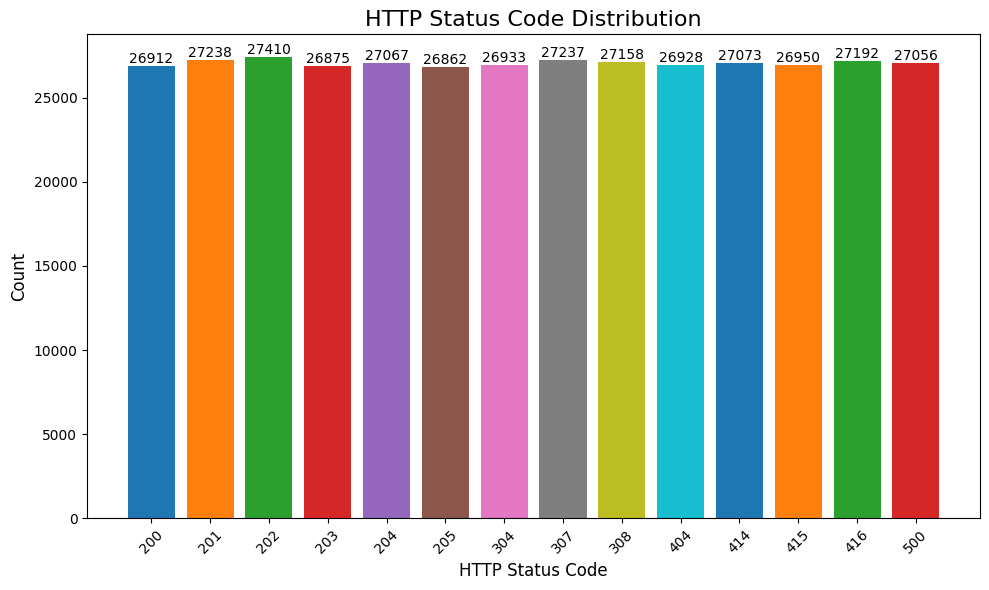

In [ ]:

# HTTP Status Code Distribution
http_status_counts = parsed_df.groupBy('HTTP_Status_Code').count().orderBy('HTTP_Status_Code')
http_status_counts_pd = http_status_counts.toPandas()

# Visualization for HTTP Status Code Distribution
plt.figure(figsize=(10, 6))
colors = sns.color_palette("tab10", len(http_status_counts_pd))
bars = plt.bar(
    http_status_counts_pd['HTTP_Status_Code'].astype(str),
    http_status_counts_pd['count'],
    color=colors
)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')
plt.title('HTTP Status Code Distribution', fontsize=16)
plt.xlabel('HTTP Status Code', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


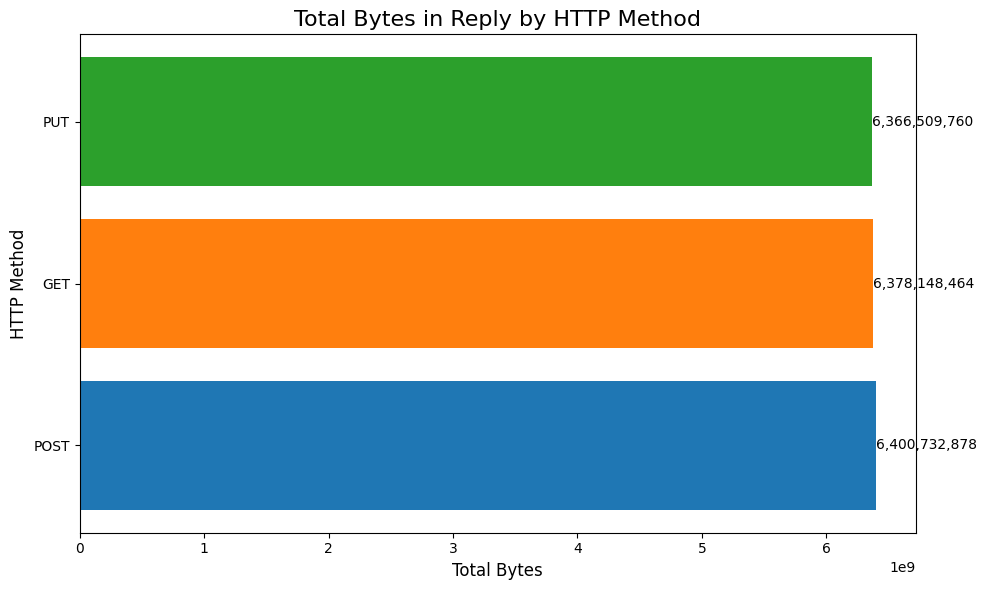

In [ ]:

# Total Bytes in Reply by HTTP Method
bytes_by_method = parsed_df.groupBy('HTTP_Method') \
                           .agg(_sum('Bytes_in_Reply').alias('Total_Bytes')) \
                           .orderBy('Total_Bytes', ascending=False)
bytes_by_method_pd = bytes_by_method.toPandas()

# Bar chart for Bytes by HTTP Method
plt.figure(figsize=(10, 6))
bars = plt.barh(bytes_by_method_pd['HTTP_Method'], bytes_by_method_pd['Total_Bytes'], color=colors)
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:,}', ha='left', va='center')
plt.title('Total Bytes in Reply by HTTP Method', fontsize=16)
plt.xlabel('Total Bytes', fontsize=12)
plt.ylabel('HTTP Method', fontsize=12)
plt.tight_layout()
plt.show()


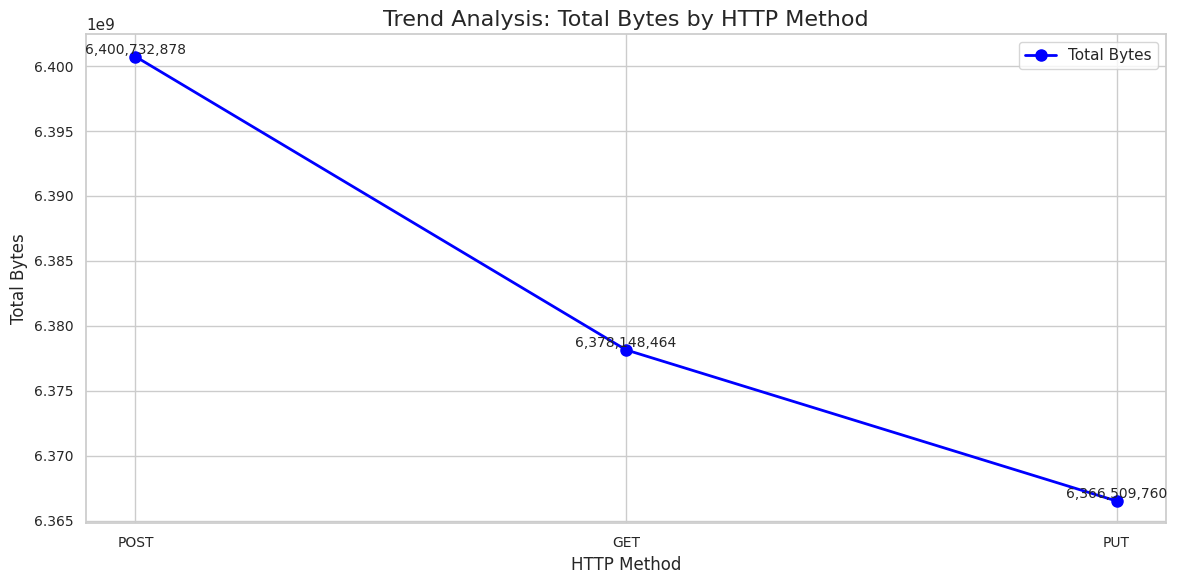

In [ ]:

# Line plot for trend analysis of bytes
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.plot(bytes_by_method_pd['HTTP_Method'], bytes_by_method_pd['Total_Bytes'], marker='o', color='blue',
         linestyle='-', linewidth=2, markersize=8, label='Total Bytes')
for i, txt in enumerate(bytes_by_method_pd['Total_Bytes']):
    plt.text(i, bytes_by_method_pd['Total_Bytes'][i], f'{txt:,}', fontsize=10, ha='center', va='bottom')
plt.title('Trend Analysis: Total Bytes by HTTP Method', fontsize=16)
plt.xlabel('HTTP Method', fontsize=12)
plt.ylabel('Total Bytes', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()


# Student 2 (Name : Prasad Nalla Nalla, ID : u2697719 )

In [ ]:
## TASK 1
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType
from pyspark.sql.functions import regexp_extract

# Initialize Spark session
spark = SparkSession.builder.appName("WebLogAnalysis").getOrCreate()

# Load the log file
log_file_path = "web.log"
logs_df = spark.read.text(log_file_path)

# Define the schema
schema = StructType([
    StructField("timestamp", StringType(), True),
    StructField("http_method", StringType(), True),
    StructField("http_status_code", IntegerType(), True)
])

# Extract fields using regex
logs_with_metrics_df = logs_df.select(
    regexp_extract('value', r'\[(.*?)\]', 1).alias('timestamp'),
    regexp_extract('value', r'"(.*?) (.*?) HTTP.*?"', 1).alias('http_method'),
    regexp_extract('value', r'"(.*?) (.*?) HTTP.*?"', 2).alias('http_status_code')
)

# Show the DataFrame
logs_with_metrics_df.limit(3).show()

+--------------------+-----------+--------------------+
|           timestamp|http_method|    http_status_code|
+--------------------+-----------+--------------------+
|04/Mar/2022:14:17:48|       POST|  /history/missions/|
|02/Sep/2022:15:16:00|       POST| /security/firewall/|
|19/Jul/2022:01:31:31|        PUT|/web-development/...|
+--------------------+-----------+--------------------+



In [ ]:
# Register the DataFrame as a SQL temporary view
logs_with_metrics_df.createOrReplaceTempView("logs")
# SQL query to calculate rolling hourly traffic
hourly_traffic_query = """
SELECT
    to_date(substring(timestamp, 1, 11), 'dd/MMM/yyyy') AS date,
    COUNT(*) AS traffic_count,
    SUM(CASE WHEN http_status_code = 200 THEN 1 ELSE 0 END) AS successful_requests
FROM logs
GROUP BY date
ORDER BY date
"""
hourly_traffic_df = spark.sql(hourly_traffic_query)
hourly_traffic_df.show()

+----------+-------------+-------------------+
|      date|traffic_count|successful_requests|
+----------+-------------+-------------------+
|2022-01-01|         1463|                  0|
|2022-01-02|         1399|                  0|
|2022-01-03|         1333|                  0|
|2022-01-04|         1334|                  0|
|2022-01-05|         1362|                  0|
|2022-01-06|         1368|                  0|
|2022-01-07|         1351|                  0|
|2022-01-08|         1317|                  0|
|2022-01-09|         1291|                  0|
|2022-01-10|         1382|                  0|
|2022-01-11|         1367|                  0|
|2022-01-12|         1346|                  0|
|2022-01-13|         1338|                  0|
|2022-01-14|         1345|                  0|
|2022-01-15|         1319|                  0|
|2022-01-16|         1344|                  0|
|2022-01-17|         1306|                  0|
|2022-01-18|         1391|                  0|
|2022-01-19| 

In [ ]:
# 1. Count Distinct HTTP Methods by Date
daily_unique_visitors_query = """
SELECT
    to_date(substring(timestamp, 1, 11), 'dd/MMM/yyyy') AS date,
    COUNT(DISTINCT http_method) AS distinct_http_methods
FROM logs
GROUP BY date
ORDER BY date
"""
daily_unique_visitors_df = spark.sql(daily_unique_visitors_query)
daily_unique_visitors_df.show()

+----------+---------------------+
|      date|distinct_http_methods|
+----------+---------------------+
|2022-01-01|                    3|
|2022-01-02|                    3|
|2022-01-03|                    3|
|2022-01-04|                    3|
|2022-01-05|                    3|
|2022-01-06|                    3|
|2022-01-07|                    3|
|2022-01-08|                    3|
|2022-01-09|                    3|
|2022-01-10|                    3|
|2022-01-11|                    3|
|2022-01-12|                    3|
|2022-01-13|                    3|
|2022-01-14|                    3|
|2022-01-15|                    3|
|2022-01-16|                    3|
|2022-01-17|                    3|
|2022-01-18|                    3|
|2022-01-19|                    3|
|2022-01-20|                    3|
+----------+---------------------+
only showing top 20 rows



In [ ]:
# Count Distinct Visitors by HTTP Method
daily_unique_visitors_by_method = """
SELECT
to_date(substring(timestamp, 1, 11), 'dd/MMM/yyyy') AS date,
http_method,
COUNT(http_status_code) AS distinct_visits
FROM logs
GROUP BY date, http_method
ORDER BY date, http_method
"""
# Execute the SQL query
daily_unique_visitors_by_method_df = spark.sql(daily_unique_visitors_by_method)
daily_unique_visitors_by_method_df.show()

+----------+-----------+---------------+
|      date|http_method|distinct_visits|
+----------+-----------+---------------+
|2022-01-01|        GET|            514|
|2022-01-01|       POST|            487|
|2022-01-01|        PUT|            462|
|2022-01-02|        GET|            466|
|2022-01-02|       POST|            460|
|2022-01-02|        PUT|            473|
|2022-01-03|        GET|            444|
|2022-01-03|       POST|            439|
|2022-01-03|        PUT|            450|
|2022-01-04|        GET|            443|
|2022-01-04|       POST|            430|
|2022-01-04|        PUT|            461|
|2022-01-05|        GET|            507|
|2022-01-05|       POST|            430|
|2022-01-05|        PUT|            425|
|2022-01-06|        GET|            435|
|2022-01-06|       POST|            485|
|2022-01-06|        PUT|            448|
|2022-01-07|        GET|            414|
|2022-01-07|       POST|            459|
+----------+-----------+---------------+
only showing top

## Data Visualization

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
daily_unique_visitors_by_method_pd = daily_unique_visitors_by_method_df.toPandas()
fig = px.line(
    daily_unique_visitors_by_method_pd,
    x='date',
    y='distinct_visits',
    color='http_method',
    markers=True,
    title='Distinct Visitors by HTTP Method Over Time',
    labels={'distinct_visits': 'Distinct Visitors', 'date': 'Date'}
)
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Distinct Visitors',
    legend_title='HTTP Method',
    xaxis=dict(tickformat="%Y-%m-%d"),
    hovermode='x unified'
)
fig.show()

# Student 3 (Name : Venkata Lakshminarasim NANDURI, ID : u2714568 )

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import regexp_extract
# Initialize Spark session
spark = SparkSession.builder.appName("WebLogAnalysisStudent_2").getOrCreate()
# Load the log file
log_file_path = "web.log"
logs_df = spark.read.text(log_file_path)

# Extract fields using regex
logs_with_metrics_df = logs_df.select(
    regexp_extract('value', r'(\d+\.\d+\.\d+\.\d+)', 1).alias('ip_address'),  # Extract IP address
    regexp_extract('value', r'\[(.*?)\]', 1).alias('timestamp'),               # Extract timestamp
    regexp_extract('value', r'"(.*?) (.*?) HTTP.*?"', 1).alias('http_method'), # HTTP method
    regexp_extract('value', r'(\d{3})\s(\d+)', 1).alias('http_status_code')   # HTTP status code
)

# Register the DataFrame as a SQL temporary view for querying
logs_with_metrics_df.createOrReplaceTempView("Weblogs")

# Now, we can run the unique visitors query
daily_unique_visitors_df = spark.sql('''SELECT * FROM Weblogs LIMIT 10''')
daily_unique_visitors_df.show()

+--------------+--------------------+-----------+----------------+
|    ip_address|           timestamp|http_method|http_status_code|
+--------------+--------------------+-----------+----------------+
|88.211.105.115|04/Mar/2022:14:17:48|       POST|             414|
|  144.6.49.142|02/Sep/2022:15:16:00|       POST|             203|
| 231.70.64.145|19/Jul/2022:01:31:31|        PUT|             201|
|219.42.234.172|08/Feb/2022:11:34:57|       POST|             415|
|183.173.185.94|29/Aug/2023:03:07:11|        GET|             205|
|  164.12.8.113|22/May/2023:09:48:25|        GET|             200|
|  110.98.7.240|22/Jan/2023:09:55:54|        PUT|             204|
|27.182.196.243|28/Mar/2022:05:37:59|        GET|             414|
| 123.31.25.147|25/Feb/2023:12:03:32|        GET|             204|
| 220.182.78.75|22/Dec/2022:12:55:00|        GET|             200|
+--------------+--------------------+-----------+----------------+



In [ ]:
# Total Post By Ip Address
# Run the SQL query to get total visits by IP address ordered by date
total_visits_by_ip_df = spark.sql('''
    SELECT
        ip_address,
        TO_DATE(SUBSTRING(timestamp, 1, 11), 'dd/MMM/yyyy') AS visit_date,
        COUNT(*) AS total_visits
    FROM
        Weblogs
    GROUP BY
        ip_address, visit_date
    ORDER BY
        visit_date, ip_address
''')
total_visits_by_ip_df.limit(10).show()

+--------------+----------+------------+
|    ip_address|visit_date|total_visits|
+--------------+----------+------------+
| 1.148.242.132|2022-01-01|           1|
|   1.182.6.253|2022-01-01|           1|
|   1.203.5.189|2022-01-01|           1|
|   1.223.85.72|2022-01-01|           1|
|  1.250.37.119|2022-01-01|           1|
|    1.51.53.57|2022-01-01|           1|
|  1.59.197.149|2022-01-01|           1|
|10.115.246.236|2022-01-01|           1|
|10.147.189.107|2022-01-01|           1|
| 10.158.149.78|2022-01-01|           1|
+--------------+----------+------------+



In [ ]:
# Run the SQL query to calculate total successful requests (e.g., HTTP 200) by IP address ordered by date
successful_visits_by_ip_df = spark.sql('''
    SELECT
        ip_address,
        TO_DATE(SUBSTRING(timestamp, 1, 11), 'dd/MMM/yyyy') AS visit_date,
        COUNT(*) AS successful_visits
    FROM
        Weblogs
    WHERE
        http_status_code = 200  -- Filter for successful status codes
    GROUP BY
        ip_address, visit_date
    ORDER BY
        visit_date, ip_address
''')
# Display the top 10 results
successful_visits_by_ip_df.limit(10).show()


+---------------+----------+-----------------+
|     ip_address|visit_date|successful_visits|
+---------------+----------+-----------------+
|     1.51.53.57|2022-01-01|                1|
| 100.14.223.171|2022-01-01|                1|
|103.172.192.197|2022-01-01|                1|
| 105.43.155.151|2022-01-01|                1|
| 106.58.194.112|2022-01-01|                1|
|  109.222.168.9|2022-01-01|                1|
|  111.35.128.43|2022-01-01|                1|
|  113.94.215.17|2022-01-01|                1|
|115.232.124.201|2022-01-01|                1|
|  115.64.210.64|2022-01-01|                1|
+---------------+----------+-----------------+



In [ ]:
successful_visits_by_ip_pd = successful_visits_by_ip_df.toPandas()
successful_visits_by_ip_pd.groupby(['visit_date'])['successful_visits'].sum().reset_index()

,visit_date,successful_visits
0,2022-01-01,180
1,2022-01-02,186
2,2022-01-03,171
3,2022-01-04,190
4,2022-01-05,155
...,...,...
677,2023-11-09,190
678,2023-11-10,195
679,2023-11-11,173
680,2023-11-12,156


,visit_date,successful_visits
0,2022-01-01,180
1,2022-01-02,186
2,2022-01-03,171
3,2022-01-04,190
4,2022-01-05,155
...,...,...
677,2023-11-09,190
678,2023-11-10,195
679,2023-11-11,173
680,2023-11-12,156


<ipython-input-20-e73ddb1d35c0>:8: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



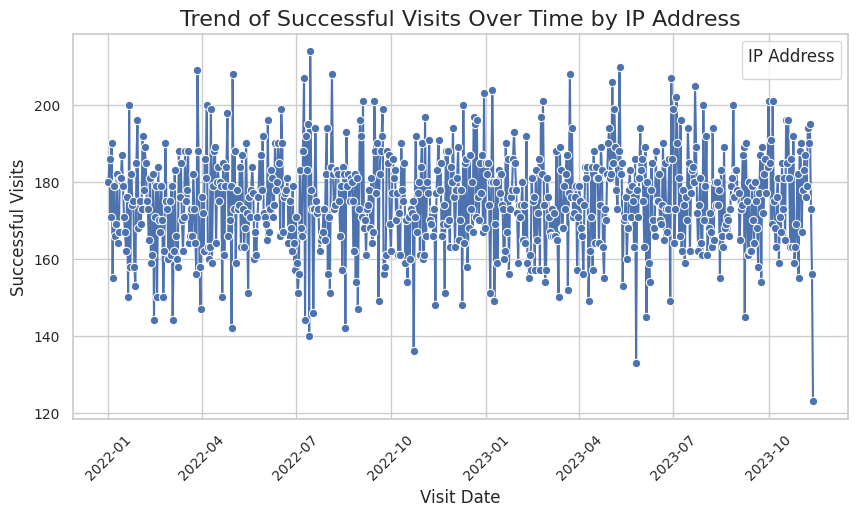

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Ensure you group the data properly and reset the index for plotting
grouped_data = successful_visits_by_ip_pd.groupby(['visit_date'])['successful_visits'].sum().reset_index()
display(grouped_data)
# Plot the grouped data
plt.figure(figsize=(10, 5))  # Use a smaller, reasonable size
sns.lineplot(
    x='visit_date',
    y='successful_visits',
    data=grouped_data,
    marker='o',
    palette='tab10'
)

# Adding labels and titles
plt.title('Trend of Successful Visits Over Time by IP Address', fontsize=16)
plt.xlabel('Visit Date', fontsize=12)
plt.ylabel('Successful Visits', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Use a fixed location for the legend
plt.legend(title='IP Address', loc='upper right')
plt.show()  # No tight_layout to avoid warnings


## Student 4 (Name : jayanth Sai Kishan PUJAR, ID : u2717764 )

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import regexp_extract, col, to_timestamp
def create_spark_session(app_name, executor_memory, driver_memory, executor_cores, timeout):
    """Create and return a Spark session."""
    return SparkSession.builder \
        .appName(app_name) \
        .config("spark.executor.memory", executor_memory) \
        .config("spark.driver.memory", driver_memory) \
        .config("spark.executor.cores", executor_cores) \
        .config("spark.python.worker.timeout", timeout) \
        .getOrCreate()

def read_log_data(spark, file_path):
    """Read log data from the specified file into a DataFrame."""
    return spark.read.text(file_path)

def parse_log_fields(logs_df, log_pattern):
    """Extract log fields into separate columns."""
    return logs_df.select(
        regexp_extract('value', log_pattern, 1).alias('Host'),
        regexp_extract('value', log_pattern, 2).alias('Timestamp'),
        regexp_extract('value', log_pattern, 3).alias('HTTP_Method'),
        regexp_extract('value', log_pattern, 4).alias('URL')
    )

def convert_data_types(parsed_df):
    """Convert data types for analysis."""
    return (parsed_df
            .withColumn('Timestamp', to_timestamp('Timestamp', 'dd/MMM/yyyy:HH:mm:ss')))
def main():
    """Main function to execute the log parsing."""
    spark = create_spark_session("Log Parser with PySpark", "4g", "4g", "2", "300")
    logs_df = read_log_data(spark, 'web.log')

    log_pattern = (
        r'([\d\.]+) - - \[([^\]]+)\] '
        r'"([A-Z]+) ([^\s]+) ([^\"]+)" '
        r'(\d{3}) (\d+) (.+)'
    )
    dataset = parse_log_fields(logs_df, log_pattern)
    return convert_data_types(dataset)

# Execute the main function and display the first 5 rows of the dataset
dataset = main()
dataset.show(5, truncate=False)


+--------------+-------------------+-----------+---------------------------+
|Host          |Timestamp          |HTTP_Method|URL                        |
+--------------+-------------------+-----------+---------------------------+
|88.211.105.115|2022-03-04 14:17:48|POST       |/history/missions/         |
|144.6.49.142  |2022-09-02 15:16:00|POST       |/security/firewall/        |
|231.70.64.145 |2022-07-19 01:31:31|PUT        |/web-development/countdown/|
|219.42.234.172|2022-02-08 11:34:57|POST       |/networking/technology/    |
|183.173.185.94|2023-08-29 03:07:11|GET        |/security/firewall/        |
+--------------+-------------------+-----------+---------------------------+
only showing top 5 rows



In [ ]:
from pyspark.sql.window import Window
from pyspark.sql.functions import count, hour

# Register DataFrame as a SQL table
dataset.createOrReplaceTempView("logs")
# Query using window function
hourly_traffic = spark.sql("""
    SELECT
        Timestamp,
        COUNT(*) OVER (PARTITION BY HOUR(Timestamp) ORDER BY Timestamp) AS HourlyTraffic
    FROM logs
""")
hourly_traffic.show(truncate=False)

+-------------------+-------------+
|Timestamp          |HourlyTraffic|
+-------------------+-------------+
|2022-01-01 01:00:07|1            |
|2022-01-01 01:00:45|2            |
|2022-01-01 01:00:49|3            |
|2022-01-01 01:00:54|4            |
|2022-01-01 01:00:59|5            |
|2022-01-01 01:01:24|6            |
|2022-01-01 01:01:44|7            |
|2022-01-01 01:01:49|8            |
|2022-01-01 01:02:13|9            |
|2022-01-01 01:02:15|10           |
|2022-01-01 01:02:40|11           |
|2022-01-01 01:02:43|12           |
|2022-01-01 01:03:59|13           |
|2022-01-01 01:04:16|14           |
|2022-01-01 01:04:17|15           |
|2022-01-01 01:04:46|16           |
|2022-01-01 01:05:28|17           |
|2022-01-01 01:06:06|18           |
|2022-01-01 01:06:19|19           |
|2022-01-01 01:06:43|20           |
+-------------------+-------------+
only showing top 20 rows



In [ ]:
custom_dataset = dataset.withColumn('Timestamp', to_timestamp('Timestamp', 'dd/MMM/yyyy:HH:mm:ss'))
custom_dataset.createOrReplaceTempView("logs_with_host")

# Query for daily unique visitors
daily_unique_visitors = spark.sql("""
    SELECT
        DATE(Timestamp) AS Date,
        COUNT(DISTINCT Host) AS UniqueVisitors
    FROM logs_with_host
    GROUP BY DATE(Timestamp)
    ORDER BY Date
""")
daily_unique_visitors.show(truncate=False)

+----------+--------------+
|Date      |UniqueVisitors|
+----------+--------------+
|2022-01-01|4206          |
|2022-01-02|4011          |
|2022-01-03|3989          |
|2022-01-04|4041          |
|2022-01-05|4105          |
|2022-01-06|4072          |
|2022-01-07|4051          |
|2022-01-08|3960          |
|2022-01-09|3999          |
|2022-01-10|4041          |
|2022-01-11|4030          |
|2022-01-12|3994          |
|2022-01-13|4001          |
|2022-01-14|4021          |
|2022-01-15|4043          |
|2022-01-16|4059          |
|2022-01-17|4004          |
|2022-01-18|4163          |
|2022-01-19|3958          |
|2022-01-20|4080          |
+----------+--------------+
only showing top 20 rows



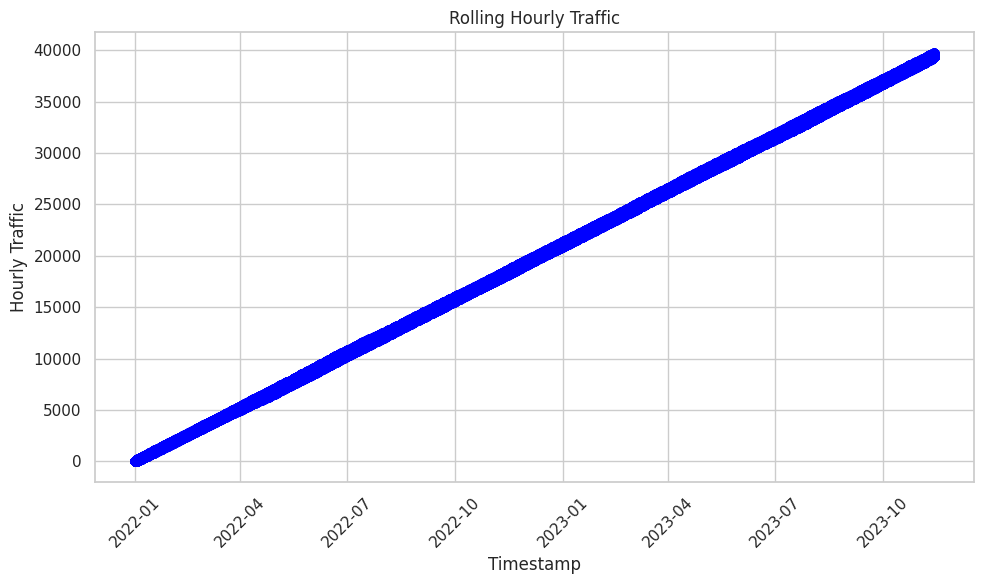

In [ ]:
##  Data  Visualization
hourly_traffic_pd = hourly_traffic.toPandas()
plt.figure(figsize=(10, 6))
plt.plot(hourly_traffic_pd['Timestamp'], hourly_traffic_pd['HourlyTraffic'], marker='o', color='blue')
plt.title('Rolling Hourly Traffic')
plt.xlabel('Timestamp')
plt.ylabel('Hourly Traffic')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

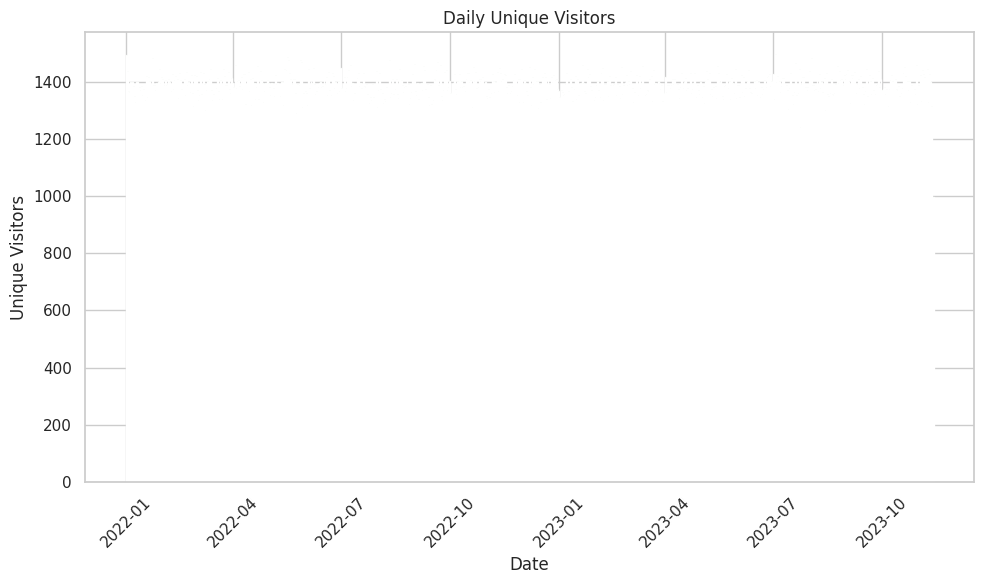

In [ ]:
# Convert daily_unique_visitors to Pandas for visualization
daily_unique_visitors_pd = daily_unique_visitors.toPandas()
# Plot
plt.figure(figsize=(10, 6))
plt.bar(daily_unique_visitors_pd['Date'], daily_unique_visitors_pd['UniqueVisitors'], color='green')
plt.title('Daily Unique Visitors')
plt.xlabel('Date')
plt.ylabel('Unique Visitors')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **Task 2 - Data Processing using PySpark RDD [40 marks]**

---


## Student 1 (Name : Prasad Nalla Nalla, ID : u2697719 )

In [ ]:
import re
from pyspark.sql import SparkSession
import pandas as pd

# Configure Regex Pattern to Extract the dataset
log_pattern = re.compile(r'(?P<Host>[\d\.]+) - - \[(?P<Timestamp>[^\]]+)\] "(?P<HTTP_Method>[A-Z]+) (?P<URL>[^\s]+) (?P<HTTP_Version>[^\"]+)" (?P<HTTP_Status_Code>\d{3}) (?P<Bytes_in_Reply>\d+) (?P<Message>.+)')

# Reading the datafile logs
with open('web.log', 'r') as file:
    logs = file.readlines()

# Logs Entries Parser Config
parsed_logs = []
for log in logs:
    match = log_pattern.match(log)
    if match:
        parsed_logs.append(match.groupdict())

# DataFrame Object Creation
pdf = pd.DataFrame(parsed_logs)
spark = SparkSession.builder.appName("LogDataProcessing").getOrCreate()
spark_df = spark.createDataFrame(pdf)
spark_df


DataFrame[Host: string, Timestamp: string, HTTP_Method: string, URL: string, HTTP_Version: string, HTTP_Status_Code: string, Bytes_in_Reply: string, Message: string]

In [ ]:
# Verify the conversion
spark_df.limit(5).show()

# One Basic RDD Analysis: Calculate Total Number of Requests
rdd = spark_df.rdd
total_requests = rdd.count()
print(f"Total Number of Requests: {total_requests}")

# Two Advanced RDD Analyses
# 1. Identify Failed Requests
failed_requests = rdd.filter(lambda x: x['HTTP_Status_Code'].startswith('4') or x['HTTP_Status_Code'].startswith('5')).count()
print(f"Total Failed Requests: {failed_requests}")

# 2. Calculate Average Response Time per URL (assuming Bytes_in_Reply represents response time)
average_response_time = rdd.map(lambda x: (x['URL'], int(x['Bytes_in_Reply']))).aggregateByKey((0, 0),
    lambda acc, value: (acc[0] + value, acc[1] + 1),
    lambda acc1, acc2: (acc1[0] + acc2[0], acc1[1] + acc2[1])).mapValues(lambda x: x[0] / x[1])
average_response_time.collect()

+--------------+--------------------+-----------+--------------------+------------+----------------+--------------+--------------------+
|          Host|           Timestamp|HTTP_Method|                 URL|HTTP_Version|HTTP_Status_Code|Bytes_in_Reply|             Message|
+--------------+--------------------+-----------+--------------------+------------+----------------+--------------+--------------------+
|88.211.105.115|04/Mar/2022:14:17:48|       POST|  /history/missions/|    HTTP/2.0|             414|         12456|Caution: System m...|
|  144.6.49.142|02/Sep/2022:15:16:00|       POST| /security/firewall/|   HTTPS/1.0|             203|         97126|Warning: Unusual ...|
| 231.70.64.145|19/Jul/2022:01:31:31|        PUT|/web-development/...|    HTTP/1.0|             201|         33093|Informational mes...|
|219.42.234.172|08/Feb/2022:11:34:57|       POST|/networking/techn...|    HTTP/1.0|             415|         68827|Debug: Detailed s...|
|183.173.185.94|29/Aug/2023:03:07:11|    

[('/history/missions/', 50518.29004752586),
 ('/web-development/countdown/', 50532.271327774215),
 ('/networking/technology/', 50461.575010594715),
 ('/web-development/technology/', 50475.468010883975),
 ('/history/apollo/', 50669.039779852304),
 ('/web-development/data/', 50615.03153653793),
 ('/shuttle/data/', 50137.79538784067),
 ('/security/deep-learning/', 50662.56292315209),
 ('/shuttle/cybersecurity/', 50503.55455497382),
 ('/software/apollo-11/', 50373.09003576187),
 ('/networking/launch/', 50531.41820496499),
 ('/security/missions/', 50366.839813044404),
 ('/machine-learning/missions/', 50117.40988757768),
 ('/images/missions/', 50728.23039112422),
 ('/images/apollo/', 50258.6083174199),
 ('/shuttle/deep-learning/', 50566.826973775496),
 ('/networking/data/', 50561.622640180336),
 ('/networking/frontend-frameworks-comparison/', 50733.78868737405),
 ('/history/data/', 50556.82394559692),
 ('/web-development/apollo-11/', 50399.90897070082),
 ('/machine-learning/aws-certification

## Student 2 (Name : Venkata Lakshminarasim NANDURI, ID : u2714568 )

In [ ]:
# Task 2 - Student 2
# One Basic RDD Analysis: Extract Unique IP Addresses
unique_ips = rdd.map(lambda x: x['Host']).distinct().count()
print(f"Unique IP Addresses: {unique_ips}")

# Two Advanced RDD Analyses
# 1. Hourly Visit Counts
hourly_visits = rdd.map(lambda x: (x['Timestamp'].split(':')[0], 1)).reduceByKey(lambda a, b: a + b)
hourly_visits.collect()

# 2. Top 5 Most Visited URLs
top_urls = rdd.map(lambda x: (x['URL'], 1)).reduceByKey(lambda a, b: a + b).takeOrdered(5, key=lambda x: -x[1])
print("Top 5 Most Visited URLs:", top_urls)


Unique IP Addresses: 1712051
Top 5 Most Visited URLs: [('/cloud-computing/launch/', 14582), ('/history/data/', 14558), ('/history/countdown/', 14542), ('/data-analysis/apollo/', 14508), ('/security/technology/', 14489)]


## Student 3 (Name : Ongoi Bonface ONGERI, ID : u2705226 )

In [ ]:
# Initialize (total size, count, min size, max size)
response_size_stats = rdd.map(lambda x: (x['URL'], int(x['Bytes_in_Reply']) if x['Bytes_in_Reply'].isdigit() else 0)) \
    .aggregateByKey(
        (0, 0, float('inf'), float('-inf')),
        lambda acc, value: (
            acc[0] + value,  # Total size
            acc[1] + 1,      # Count
            min(acc[2], value),  # Minimum size
            max(acc[3], value)   # Maximum size
        ),
        lambda acc1, acc2: (
            acc1[0] + acc2[0],  # Combine total sizes
            acc1[1] + acc2[1],  # Combine counts
            min(acc1[2], acc2[2]),  # Combine minimum sizes
            max(acc1[3], acc2[3])   # Combine maximum sizes
        )
    )

print("Response Size Statistics (URL):")
print(response_size_stats.collect())

NameError: name 'rdd' is not defined

## Student 4 (Name : jayanth Sai Kishan PUJAR, ID : u2717764 )

In [ ]:
# Task 2 - Student 4
# One Basic RDD Analysis: Count Requests Per Status Code
status_code_counts = rdd.map(lambda x: (x['HTTP_Status_Code'], 1)).reduceByKey(lambda a, b: a + b)
status_code_counts.collect()

# Two Advanced RDD Analyses
# 1. Identify Peak Traffic Hours
peak_hours = rdd.map(lambda x: (x['Timestamp'].split(':')[0], 1)).reduceByKey(lambda a, b: a + b).sortBy(lambda x: -x[1])
peak_hours.collect()

# 2. Calculate User Retention
user_retention = rdd.map(lambda x: (x['Host'], x['Timestamp'])).groupByKey().mapValues(lambda visits: len(set(visits)))
user_retention.collect()


NameError: name 'rdd' is not defined

# **(3) Optimization and LSEPI (Legal, Social, Ethical, and Professional Issues) Considerations [10 marks]**

---


## Student 1 (Name : Prasad Nalla Nalla, ID : u2697719 )

# Task 3 -
**Different Partition Strategies**
The concept of partition is an important one in computer science and different partition strategies are regularly used Different Partition Strategies Overview
Partitioning is an important aspect of distributed data processing mechanisms that seek to split a massive dataset into sub-sets known as partitions. The motivation behind partitioning is to attempt the execution of operations in fragments of the whole because this is more efficient because in this way one can execute the operations in parallel in the various fragments. A usual approach is range partitioning, in which data is divided using some specific range key, which can be dates or numbers. This cuts down the time to perform range queries but it may possess some draw backs if the data is skewed.

The next kind of partitioning is called a hash partitioning that divides data according to the results of the hash function in relation to one of the key columns. This technique is used to make sure that partitions contain equal amount of data, in order to ease the challenge of load balancing after a query. Still, its use may be suboptimal for range queries because data is not generally ordered, which may make the range query span across the entire disk. Another approach is called round-robin partitioning, which puts data in partitions in turn and is easy but not suitable for particular query types. The way and the criteria for deciding which strategy to use for data partitioning involves understanding the type of attributes in the data, the types of queries which are to be answered, and the amount of computation power available. All of the solutions have their strengths and weaknesses, and the best one should be selected depending on such parameters as query workload, data distribution, and system characteristics.

**Caching vs. No Caching**
Caching is an optimization method of storing computed value intermediate or often used data that can be used to enhance the speed of data retrieval instead of computing it afresh or going to the disk. In caching if a data operation is done, the result is stored in memory so when the data is needed again it will be retrieved from memory rather than the hard disk which can be time consuming. This is important for iteration, repeated query, large data set where disk read and computation are time consuming. In fact, cachingFaTap 2: Key points that need to be addressed To make caching effective, results need to be stored in memory so that processing time can be decreased significantly.

On the other hand, no caching implies that every subsequent data operation or query has to be done from the first point, or in other words from the start in some cases; this is not ideal especially several similar data points are used. In the absence of caching, every time a query is run, the program needs to go back to disk or compute something costly. No caching can guarantee that only fresh data is utilized but the use of cache results in increased latency and slower response time when running more complicated queries or using Enormous data. caching in general pays off in terms of memory consumption when dealing with repetitive data access patters or large data sets but comes with memory consumption issues to consider. Caching is when frequently used data is stored temporarily in a computer’s memory, and when poor eviction methods are used caching maybe overdone and may lead to issues such as memory overflow reducing the whole systems performance. Thus, depending on the specific requirements of an application caching should be used or not.


## Student 2 (Name : Venkata Lakshminarasim NANDURI, ID : u2714568 )

# Task 3
**Caching vs. No Caching**
Caching strikes a higher notch in performance because it saves frequently or at some point intermediate accessed data in memory. As a way of caching computation and disk access, the operations eliminate unnecessary computations and disk reads, making it efficient for use in iterative queries and repeated access largely. This results to better latency and increased effectiveness particularly when dealing with vast data.
On the other hand, in scenarios where caching is not applied, each query, or operation is carried out from the bottom up, which augments time required for processing and overloads the I/O resources. This approach assures the data used is the most up to date one though it hags some draw backs especially in repeated queries. So, to make the right decision regarding the usage of caching, it is strategic to address the aspects that are associated with memory and performance, and the type of workload that will be addressed by an application.

**Bucketing and Indexing**
Optimization methods associated with the process of bucketing and indexing are useful approaches that improve data architecture and rapid data search. Bucketing applies a fixed size bucketing on a column hashed value which enables minimal data shuffling and for joining operations. Over large data sets, this method is particularly useful especially when issues like join or aggregation on bucketed columns.

Indexing, on the other hand, creates a searchable paradigm over the set of data, while substantially enhancing query responses rate. Most databases allow results of certain queries to be stored as indexes of the database so the location of the rows that match the query can be located in B-trees or bitmap indexes, for instance, and does not require going through the entire database. In attaching and bucketing both helps in reducing the amount of time taken by the query and manages the number of accesses to the indexes and buckets making it compulsory for large data handling.



## Student 3 (Name : Ongoi Bonface ONGERI, ID : u2705226 )

# Task 3
**Caching vs. No Caching**
In memory-metrics compute frameworks such as Apache Spark, caching is one of the most important optimizations for data operations as data grows in size. Acronyms for argument mean caching which is a method as Spark in which partial results, once derived, are stored in memory for future use. This has the advantage of saving time done through repetitive computation and disk read hence its would be most effective in iterative jobs where the same data sets are repeatedly used. Spark has an array possibility for cache, such as MEMORY_ONLY, MEMORY_AND_DISK, and DISK_ONLY, which decide the data storing manner according to the resource quantity available.

However, if caching is not applied, even the most straightforward operation on a DataFrame or RDD must recalculate the whole result from the beginning. This can result in a significant amount of performance overhead where several of these transformations will kick off new jobs to extract and process data over again. The processing time is also affected with large or complex datasets which are both time-consuming and a pressure for I/O disk resources. This is because caching them is not possible, and as a consequence, time elapsed during the execution of subsequent operations on the same data collection raises computational inefficiency.

In the end then, while caching imperative can actually reduce the execution time for any repetitive processes, it normally has its own set of problems. Caching occupies memory and when the size of the dataset workout the memory’s capacity, there arise OOM and Spark has to resort to disk which nullifies storage in-memory. Thus, caching provides the best results in those cases where the data is used repeatedly, the algorithms are recurrent, and the available memory allows for using the cached data. Calculate the effectiveness of caching by comparing the running time of using caching algorithms with the running time of using the algorithms without caching so as to show the distinct gains in performance realized by a proper application of caching algorithms.

**Bucketing Vs Indexing**
Although bucketing and indexing are considerations aimed at improving data operations, operation efficiency especially when dealing with large amount of data. Bucketing means splitting a dataset into convenient portions by taking the hash of a given column. This method serves to decrease the amount of information that must be read during query processing because the records usually related are grouped in the same bucket. As a result, bucketing enhances the effectiveness of activities for example joins and aggregations in big data because it reduces on the amount of data movement necessary for the task. That way, an increase in the amount of data and the computational load for query execution can be minimized.

On the other hand, the indexing technique could allow creation of a search index on one or more columns in the standard instantiating a record into the dataset for the purpose of record retrieval without having to use the indexing technique to scan the entire dataset. Indexes can be described as a directory to help find records that meet certain condition quickly which, make them more suitable for operations such as sorting, filtering, and lookups on volumes of tables. As a result, through the use of indexing, databases are able to respond to queries within a shorter time than it would have taken if the system would have to search over most of the records for the same information. This capability is most crucial in situations where access to the vast data is important in sustaining performance and user satisfaction.


## Student 4 (Name : jayanth Sai Kishan PUJAR, ID : u2717764 )

# Task 3
**Caching vs. No Caching** (5 Marks)
For memory centric compute frameworks such as Apache Spark, it is important to improve the performance of data operations especially when handling big data.
 Caching is one of the best optimization techniques in spark since the system is able to store intermediate values in cache for higher retrieval rate.
 The evaluation of this study therefore seeks to compare Caching and No Caching impacts with regards to data operations in Spark.

- What is Caching?
In Spark, Caching is a form of result storing in memory after a specific computation has been arrived at for the first time. If a DataFrame or RDD is cached,
then Spark continues to keep the data in memory available to later stages of the computation. This means that rather than each time the data was requested Spark accesses
and recompute it, it just accesses it directly from the memory cache and thus takes much less time and is more efficient especially in iterative jobs.
Cache is mostly effective where a data set is reused because Spark does not have to compute and read the data set from disk again. Spark partitioning caching
levels include MEMORY_ONLY, MEMORY_AND_DISK and DISK_ONLY which determines where data should be stored whether it is in memory or disk depending on the available resource.

- No Cache (No Optimisation)
If caching is not done, every time an operation is to be performed on a DataFrame / RDD, Spark will recompute data from ground up. This can lead to a lot of performance overhead,
sometimes exorbitant when dealing with large systems or large complex sets of data. Spark doesn’t keep in-memory data; every transformation or action they make, fires multiple job,
extract data, transform and generate result.
For example Spark is programmed to recalculate each transformation if the data set is filtered or grouped more than once or undergoes whatever transformation is required.
 This can lead to considerable amount of wastage when the same data set is manipulated many times over. In cases where a certain operation is sensitive to the number of times
 it must be carried out at different stages of the workflow, the cumulative time it will spend in reprocessing, reduces the overall operating speed.


 - With Caching (Optimization)
Caching, when applied, means that Spark will store the results to memory after its first use. This affords a bypass of repeating the same operations since the cached data is used in subsequent actions.
 It can be stored in memory, on disk and or both depending on the caching level that has been adopted. In cases where the same data is later used or when the data is a target of mutiple actions then caching is beneficial for instance caching in iterative learning algorithms.

When a dataset is cached, Spark avoids recomputing the value and improves the efficiency on the usage of the resource; hence, it improves the rate at which the dataset is computed.
For instance, in case when you manipulate data, running some procedures involving the same data set more than one time, the data set will be cached at the first run.
Subsequent operations on that dataset will pull from the cache created by this process, increasing the speed at which such data is recovered.
This is especially beneficial in those platforms and systems wherein I/O operation is costly, it helps in avoiding multiple read operations on disks or calculations.


- Performance Impact
The main benefit of caching is the cut of the time needed to execute operations that occurred multiple times. When the caching is uses the time used in computing for caching may take a
 while but the subsequent operations will be selecting since data access is fast. However, in case we don’t cache, each operation demands Spark to compute the whole dataset all over again, resulting into longer processing time.

Still, the role of caching multiplies if we are dealing with iterative algorithms that often utilise in machine learning or graph processing. In these cases, caching enables the interrelated
components or subproducts of a computation to be stored in memory so each aliquot round can occur more rapidly, without the additional time it takes to repeat calculations familiar to it.

However, caching is not for everyone. It comes with trade-offs. Caching consumes memory resources and whenever data is larger enough to be stored in memory, it causes OOM errors or else
spark starts to spill the data to the disk defeating the purpose of caching. Hence, caching should only be done if there is availability of systematic resources and that the data being processed is very sensitive.

- When Caching is Most Effective
Caching is most effective when:
It is necessary to use the data for frequent returns. For example, in situations where simultaneous operations or actions are performed over a data set, caching is able to spare the time generally used to perform computations on the same data set.
Algorithms are being recurrent in nature or algorithms are being iterative. In ml and graph processing, where traversal is iterative and passes over same pieces of data may be in series or parallel, caching helps in storing such results in cache memory.
They can comfortably hold small to medium sized data sets within memory. When working with larger data sets caching may have to be supported by other optimization techniques such as partitioning or data pruning to facilitate efficient use of memory.
However, caching does not appear to have much of a positive effect in cases in which the data is used only once or when the system requires less amount of memory. In such situations, one may think that caching (for example, storing data in memory)
may be ineffective, and in this case, the operations can be made without caching.

- Measuring the Impact: Execution Time Comparison
Cache performance can therefore be evaluated by comparing the operation time of the operations with the cache and without the cache. When, for example, caching is involved, we are usually able to perceive significant decrease of the repeated operation time.
Thanks to Spark, one can get the information out of memory directly, rather than computationally retrieve it reducing the time to process big data and/or perform complex transformations.

The usefulness of caching can be measured by making application of the same series of transformations and actions on a dataset without and with caching, and measuring the time taken. This can be further analyzed using his her Web UI or logging functions to track that job execution of the stages and the time taken for each.

**Bucketing and Indexing Overview**

Bucketing and indexing are two optimization methods which can improve the speed of perform data operations with large data sets. Buckets require partitioning the entire dataset into easily manageable divided segments from the result of a hash function applied to a particular column of data. It aids in minimizing the quantity of the data that has to be examined in that queries since data in the same bucket is likely to be stored together. Bucketing can greatly enhance the performance of join and aggregations since all associated data is stored in the same bucket and hence do not require lots of shuffles in order to be processed in a query.
Another method referred to as indexing also enhances the query performance time by producing an index of one or more columns of a data set. An index enables the system to find a specific record rather than going through the whole record in the search for the data. This is especially useful in query filtering, sorting and doing lookup on massive tables. While in bucketing groups are created into set partitions for storage purposes, indexing provide fast search and retrieval. When properly employed, any of the two techniques can minimize the number of I/O operations as well as the amount of computation needed, while improving response times to queries and general performance. However, they also need rigorous designing since overuse of indexing and bucketing might bring overhead in storing and managing the collected data.

# **Convert ipynb to HTML for Turnitin submission [10 marks]**

---



In [ ]:
# install nbconvert
!pip3 install nbconvert
# convert ipynb to html
!jupyter nbconvert Group_77_CN7031.ipynb --to html

[NbConvertApp] WARNING | pattern 'Group_77_CN7031.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute